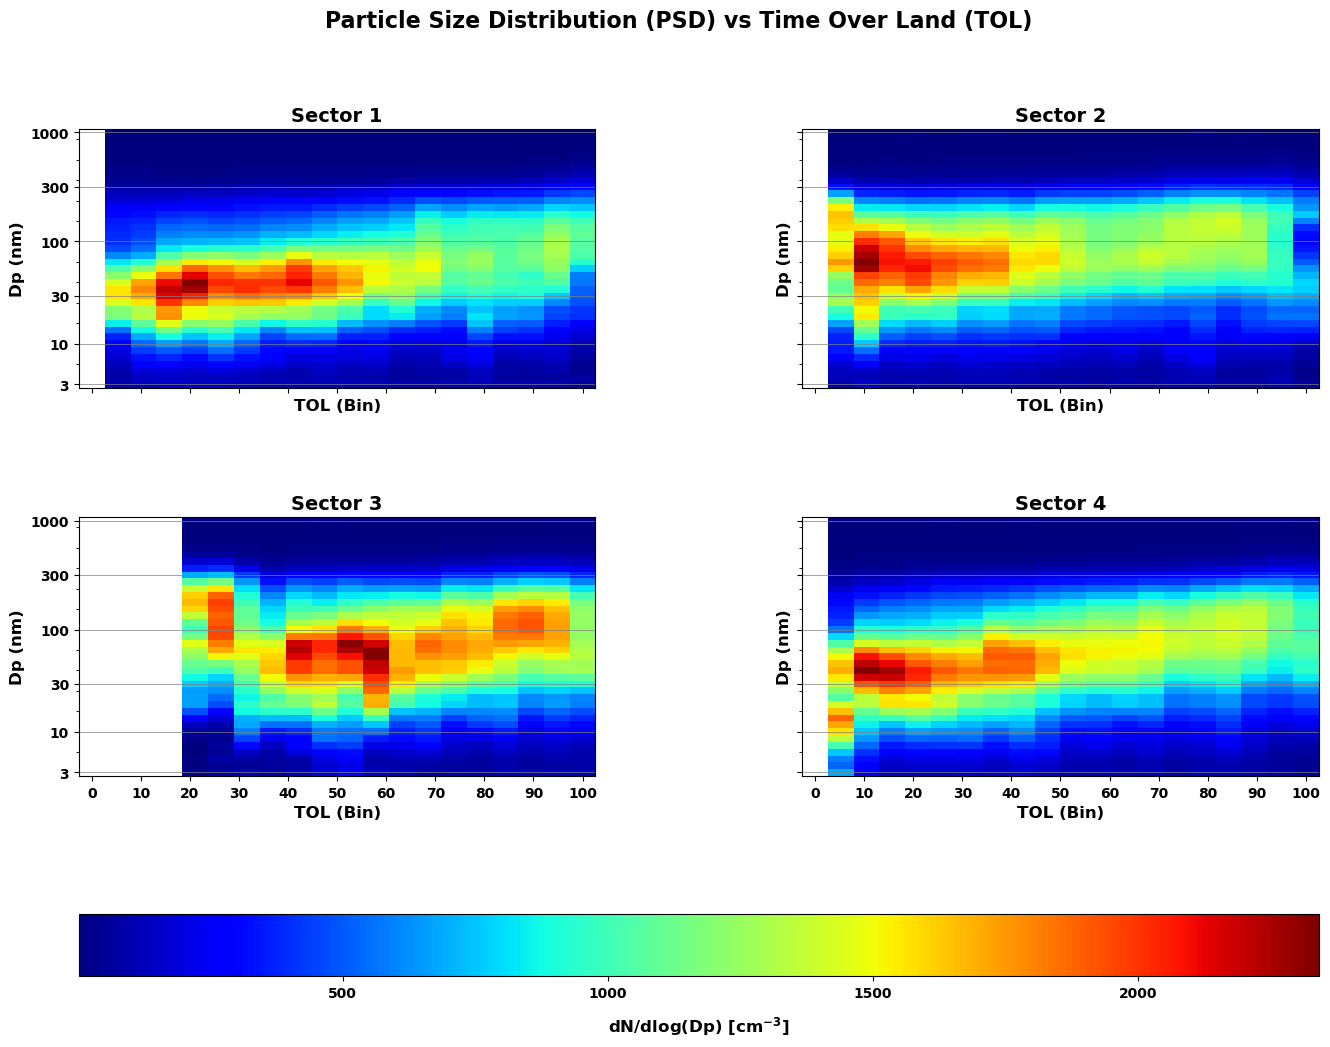

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Load the data from the Excel file
file_path = '/Users/touqeergill/Desktop/PSD VS TOL (Tunved).xlsx'
data = pd.read_excel(file_path)

# Define bin size and range for Time Over Land
bins = np.linspace(0, 100, 21)  # Creating 20 bins from 0 to 100

# Assign each 'TimeOverLand' value to a bin
data['TimeOverLandBin'] = pd.cut(data['TimeOverLand'], bins, labels=np.arange(20), right=False)

# Extract particle sizes columns and convert to float for sorting
particle_sizes = data.columns[2:-1]
particle_size_floats = [float(size) for size in particle_sizes]
sorted_indices = np.argsort(particle_size_floats)
sorted_particle_sizes = particle_sizes[sorted_indices]

# Prepare the data by binning Time Over Land and taking the mean for each bin
sector_grouped = {}
for sector in range(1, 5):
    sector_data = data[data['Sector'] == sector]
    grouped = sector_data.groupby('TimeOverLandBin')[sorted_particle_sizes].mean().T  # Transpose to align properly for imshow
    sector_grouped[sector] = grouped

# Specific ticks for the y-axis based on the requested particle sizes in nm
specific_ticks = [3e-9, 1e-8, 3e-8, 1e-7, 3e-7, 1e-6]  # Values in meters
specific_tick_labels = ['3', '10', '30', '100', '300', '1000']  # Corresponding labels in nm
specific_tick_positions = [np.argmin(np.abs(np.array(particle_size_floats) - tick)) for tick in specific_ticks]

# Plotting with 'jet' colormap
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
plt.suptitle('Particle Size Distribution (PSD) vs Time Over Land (TOL)', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flatten(), 1):
    im = ax.imshow(sector_grouped[i], aspect='auto', origin='lower', interpolation='none', cmap='jet')
    ax.set_title(f'Sector {i}', fontsize=14, fontweight='bold')
    ax.set_xlabel('TOL (Bin)', fontsize=12, fontweight='bold')
    ax.set_xticks(np.linspace(0, 19, 11))
    ax.set_xticklabels(range(0, 101, 10), fontsize=10, fontweight='bold')
    ax.set_yticks(specific_tick_positions)
    ax.set_yticklabels(specific_tick_labels, fontsize=10, fontweight='bold')
    ax.set_ylabel('Dp (nm)', fontsize=12, fontweight='bold')
    ax.grid(which='major', axis='y', linestyle='-', linewidth='0.5', color='gray')
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Add a colorbar with increased label size and bold labels
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), orientation='horizontal')
cbar.set_label('$\\mathbf{dN/dlog(Dp)\ [cm^{-3}]}$', labelpad=10, fontweight='bold', fontsize=12)

# Set bold tick labels on the colorbar
cbar.ax.tick_params(labelsize=10)
for label in cbar.ax.get_xticklabels():
    label.set_fontweight('bold')

plt.show()

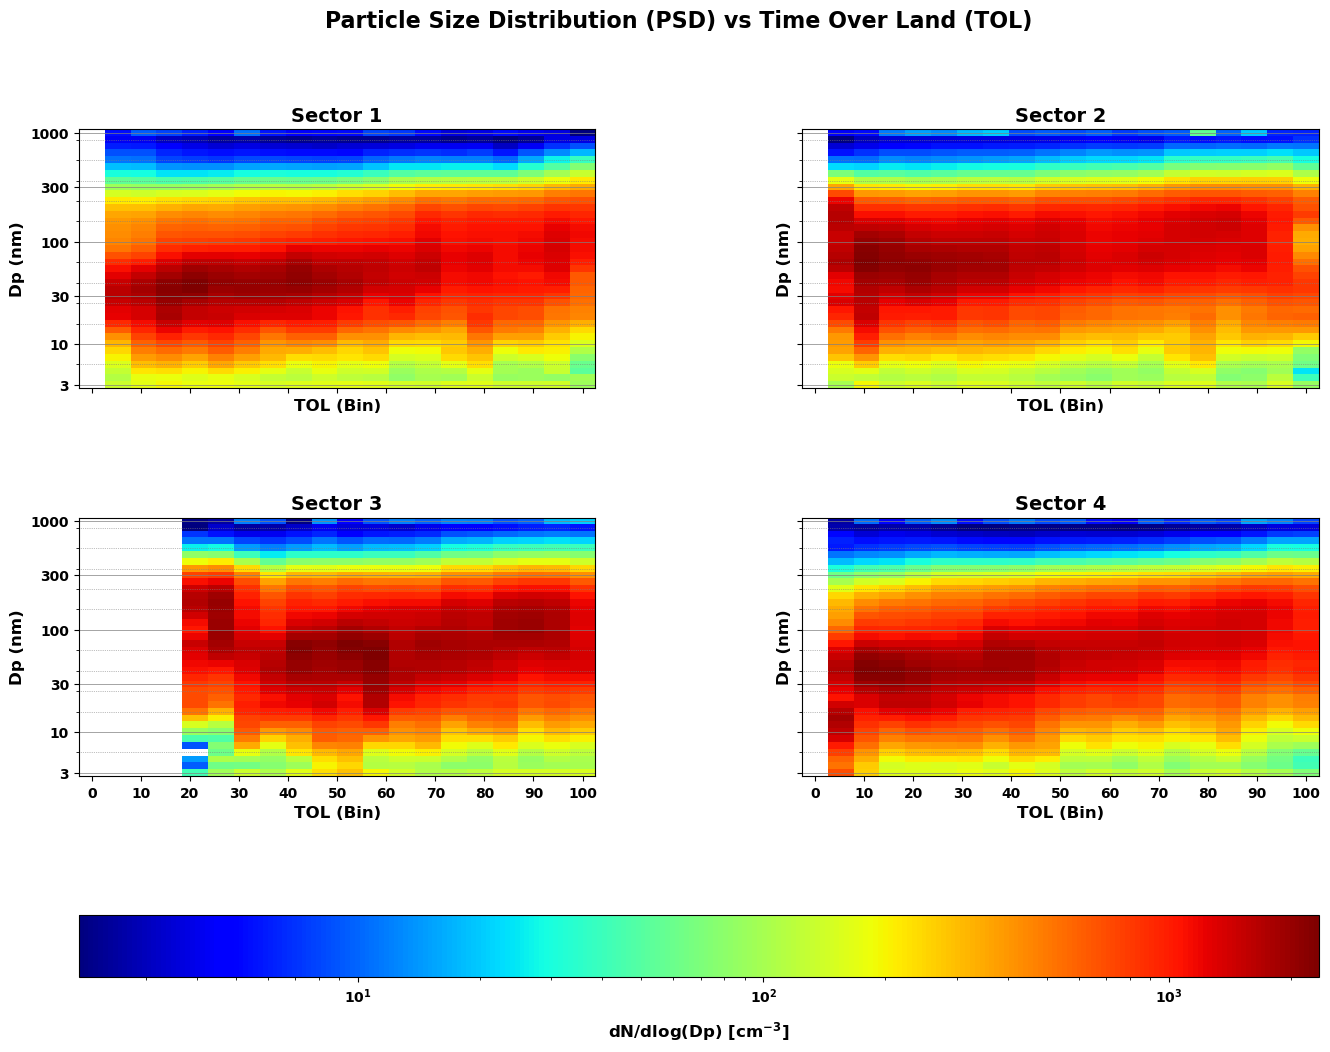

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import AutoMinorLocator

# Define the file path and file name
file_path = '/Users/touqeergill/Desktop/PSD VS TOL (Tunved).xlsx'

# Load the data from the Excel file
data = pd.read_excel(file_path)

# Define bin size and range for Time Over Land
bins = np.linspace(0, 100, 21)  # Creating 20 bins from 0 to 100

# Assign each 'TimeOverLand' value to a bin
data['TimeOverLandBin'] = pd.cut(data['TimeOverLand'], bins, labels=np.arange(20), right=False)

# Prepare the data by binning Time Over Land and taking the mean for each bin and particle size
sector_grouped = {}
particle_sizes = data.columns[2:-1]  # Exclude 'Sector', 'TimeOverLand', and 'TimeOverLandBin' from the PSD columns
for sector in range(1, 5):
    sector_data = data[data['Sector'] == sector]
    grouped = sector_data.groupby('TimeOverLandBin')[particle_sizes].mean()  # focus only on particle sizes
    sector_grouped[sector] = grouped

# Convert particle sizes to floats and sort them
particle_size_floats = np.array([float(size) for size in particle_sizes])
sorted_indices = np.argsort(particle_size_floats)
sorted_particle_sizes = particle_sizes[sorted_indices]

# Specific ticks for the y-axis based on the requested particle sizes in nm
specific_ticks = [3e-9, 1e-8, 3e-8, 1e-7, 3e-7, 1e-6]  # Values in meters
specific_tick_labels = ['3', '10', '30', '100', '300', '1000']  # Corresponding labels in nm
specific_tick_positions = [np.argmin(np.abs(particle_size_floats - tick)) for tick in specific_ticks]

# Plotting with 'jet' colormap
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
plt.suptitle('Particle Size Distribution (PSD) vs Time Over Land (TOL)', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flatten(), 1):
    im = ax.imshow(sector_grouped[i].T, aspect='auto', origin='lower', interpolation='none', cmap='jet', norm=LogNorm())
    ax.set_title(f'Sector {i}', fontsize=14, fontweight='bold')
    ax.set_xlabel('TOL (Bin)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Dp (nm)', fontsize=12, fontweight='bold')
    ax.set_xticks(np.linspace(0, 19, 11))  # Adjusted for 0, 10, 20, ..., 100
    ax.set_xticklabels(range(0, 101, 10), fontsize=10, fontweight='bold')  # Adjust labels to match the range of 0-100
    ax.set_yticks(specific_tick_positions)  # Set the specific tick positions
    ax.set_yticklabels(specific_tick_labels, fontsize=10, fontweight='bold')  # Set the corresponding labels in nm
    ax.grid(which='major', axis='y', linestyle='-', linewidth='0.5', color='gray')  # Major horizontal grid lines
    ax.grid(which='minor', axis='y', linestyle=':', linewidth='0.5', color='gray')  # Minor horizontal grid lines
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))  # Set the minor locator for more detailed grid lines

# Add a colorbar with increased label size and bold labels
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), orientation='horizontal')
cbar.set_label('$\\mathbf{dN/dlog(Dp)\ [cm^{-3}]}$', labelpad=10, fontweight='bold', fontsize=12)

# Set bold tick labels on the colorbar
cbar.ax.tick_params(labelsize=10)
for label in cbar.ax.get_xticklabels():
    label.set_fontweight('bold')

plt.show()

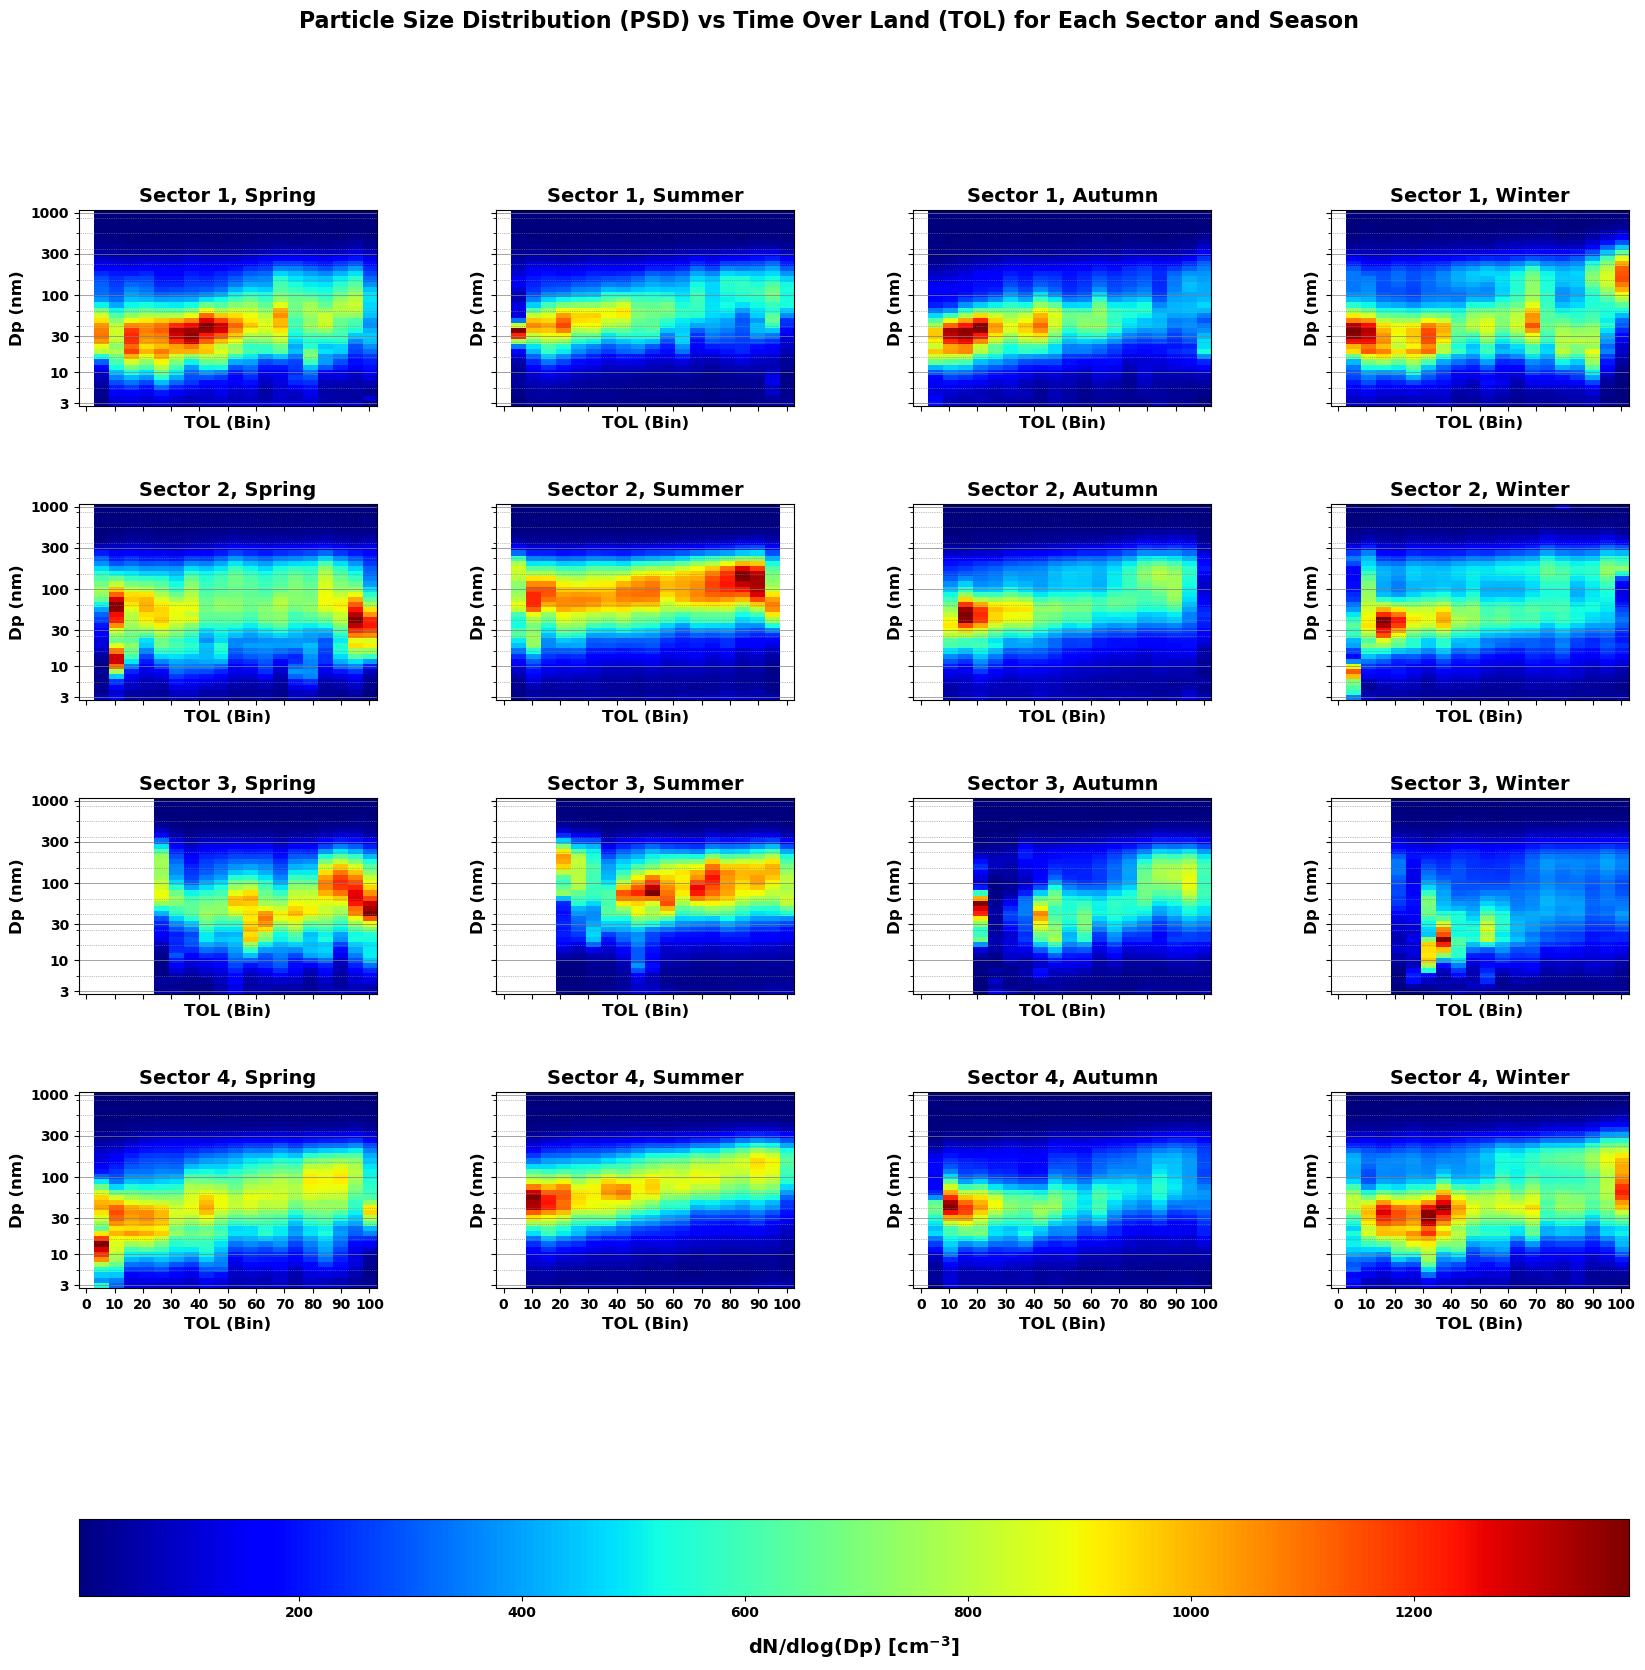

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Define the file path and file name
file_path = '/Users/touqeergill/Desktop/PSD VS TOL (Tunved)2.xlsx'

# Load the data from the Excel file
data = pd.read_excel(file_path)

# Convert 'Date and Time' to datetime type
data['Date and Time'] = pd.to_datetime(data['Date and Time'])

# Define a function to assign seasons based on the date
def assign_season(date):
    month = date.month
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

# Apply the function to create a new 'Season' column
data['Season'] = data['Date and Time'].apply(assign_season)

# Define bin size and range for Time Over Land
bins = np.linspace(0, 100, 21)  # Creating 20 bins from 0 to 100

# Assign each 'TimeOverLand' value to a bin
data['TimeOverLandBin'] = pd.cut(data['TimeOverLand'], bins, labels=np.arange(20), right=False)

# Prepare the data by binning Time Over Land and taking the mean for each bin and particle size
sector_season_grouped = {}
particle_sizes = data.columns[3:-2]  # Exclude 'Sector', 'TimeOverLand', 'TimeOverLandBin', 'Date and Time', 'Season'

for sector in range(1, 5):
    for season in ['Spring', 'Summer', 'Autumn', 'Winter']:
        season_data = data[(data['Sector'] == sector) & (data['Season'] == season)]
        grouped = season_data.groupby('TimeOverLandBin')[particle_sizes].mean()  # focus only on particle sizes
        sector_season_grouped[(sector, season)] = grouped

# Convert particle sizes to floats and sort
particle_size_floats = [float(size) for size in particle_sizes]
particle_size_floats.sort()

# Define specific tick values and labels for particle sizes (in nanometers)
specific_ticks = [3e-9, 1e-8, 3e-8, 1e-7, 3e-7, 1e-6]  # Values in meters
specific_tick_labels = ['3', '10', '30', '100', '300', '1000']  # Corresponding labels in nanometers
specific_tick_positions = [np.argmin(np.abs(np.array(particle_size_floats) - tick)) for tick in specific_ticks]

# Plotting with 'jet' colormap
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
plt.suptitle('Particle Size Distribution (PSD) vs Time Over Land (TOL) for Each Sector and Season', fontsize=16, fontweight='bold')

for idx, ((sector, season), grouped_data) in enumerate(sector_season_grouped.items()):
    ax = axes[idx // 4, idx % 4]
    im = ax.imshow(grouped_data.T, aspect='auto', origin='lower', interpolation='none', cmap='jet')
    ax.set_title(f'Sector {sector}, {season}', fontsize=14, fontweight='bold')
    ax.set_xlabel('TOL (Bin)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Dp (nm)', fontsize=12, fontweight='bold')
    ax.set_xticks(np.linspace(0, 19, 11))  # Adjusted for 0, 10, 20, ..., 100
    ax.set_xticklabels(range(0, 101, 10), fontsize=10, fontweight='bold')  # Adjust labels to match the range of 0-100
    ax.set_yticks(specific_tick_positions)  # Set specific tick positions for particle sizes
    ax.set_yticklabels(specific_tick_labels, fontsize=10, fontweight='bold')  # Set the corresponding labels in nm
    ax.grid(which='major', axis='y', linestyle='-', linewidth='0.5', color='gray')  # Major horizontal grid lines
    ax.grid(which='minor', axis='y', linestyle=':', linewidth='0.5', color='gray')  # Minor horizontal grid lines
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))  # Set the minor locator for more detailed grid lines

# Add a colorbar with increased label size and bold labels
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), orientation='horizontal')
cbar.set_label('$\\mathbf{dN/dlog(Dp)\ [cm^{-3}]}$', labelpad=10, fontweight='bold', fontsize=14)

# Set bold tick labels on the colorbar
cbar.ax.tick_params(labelsize=10)
for label in cbar.ax.get_xticklabels():
    label.set_fontweight('bold')

plt.show()

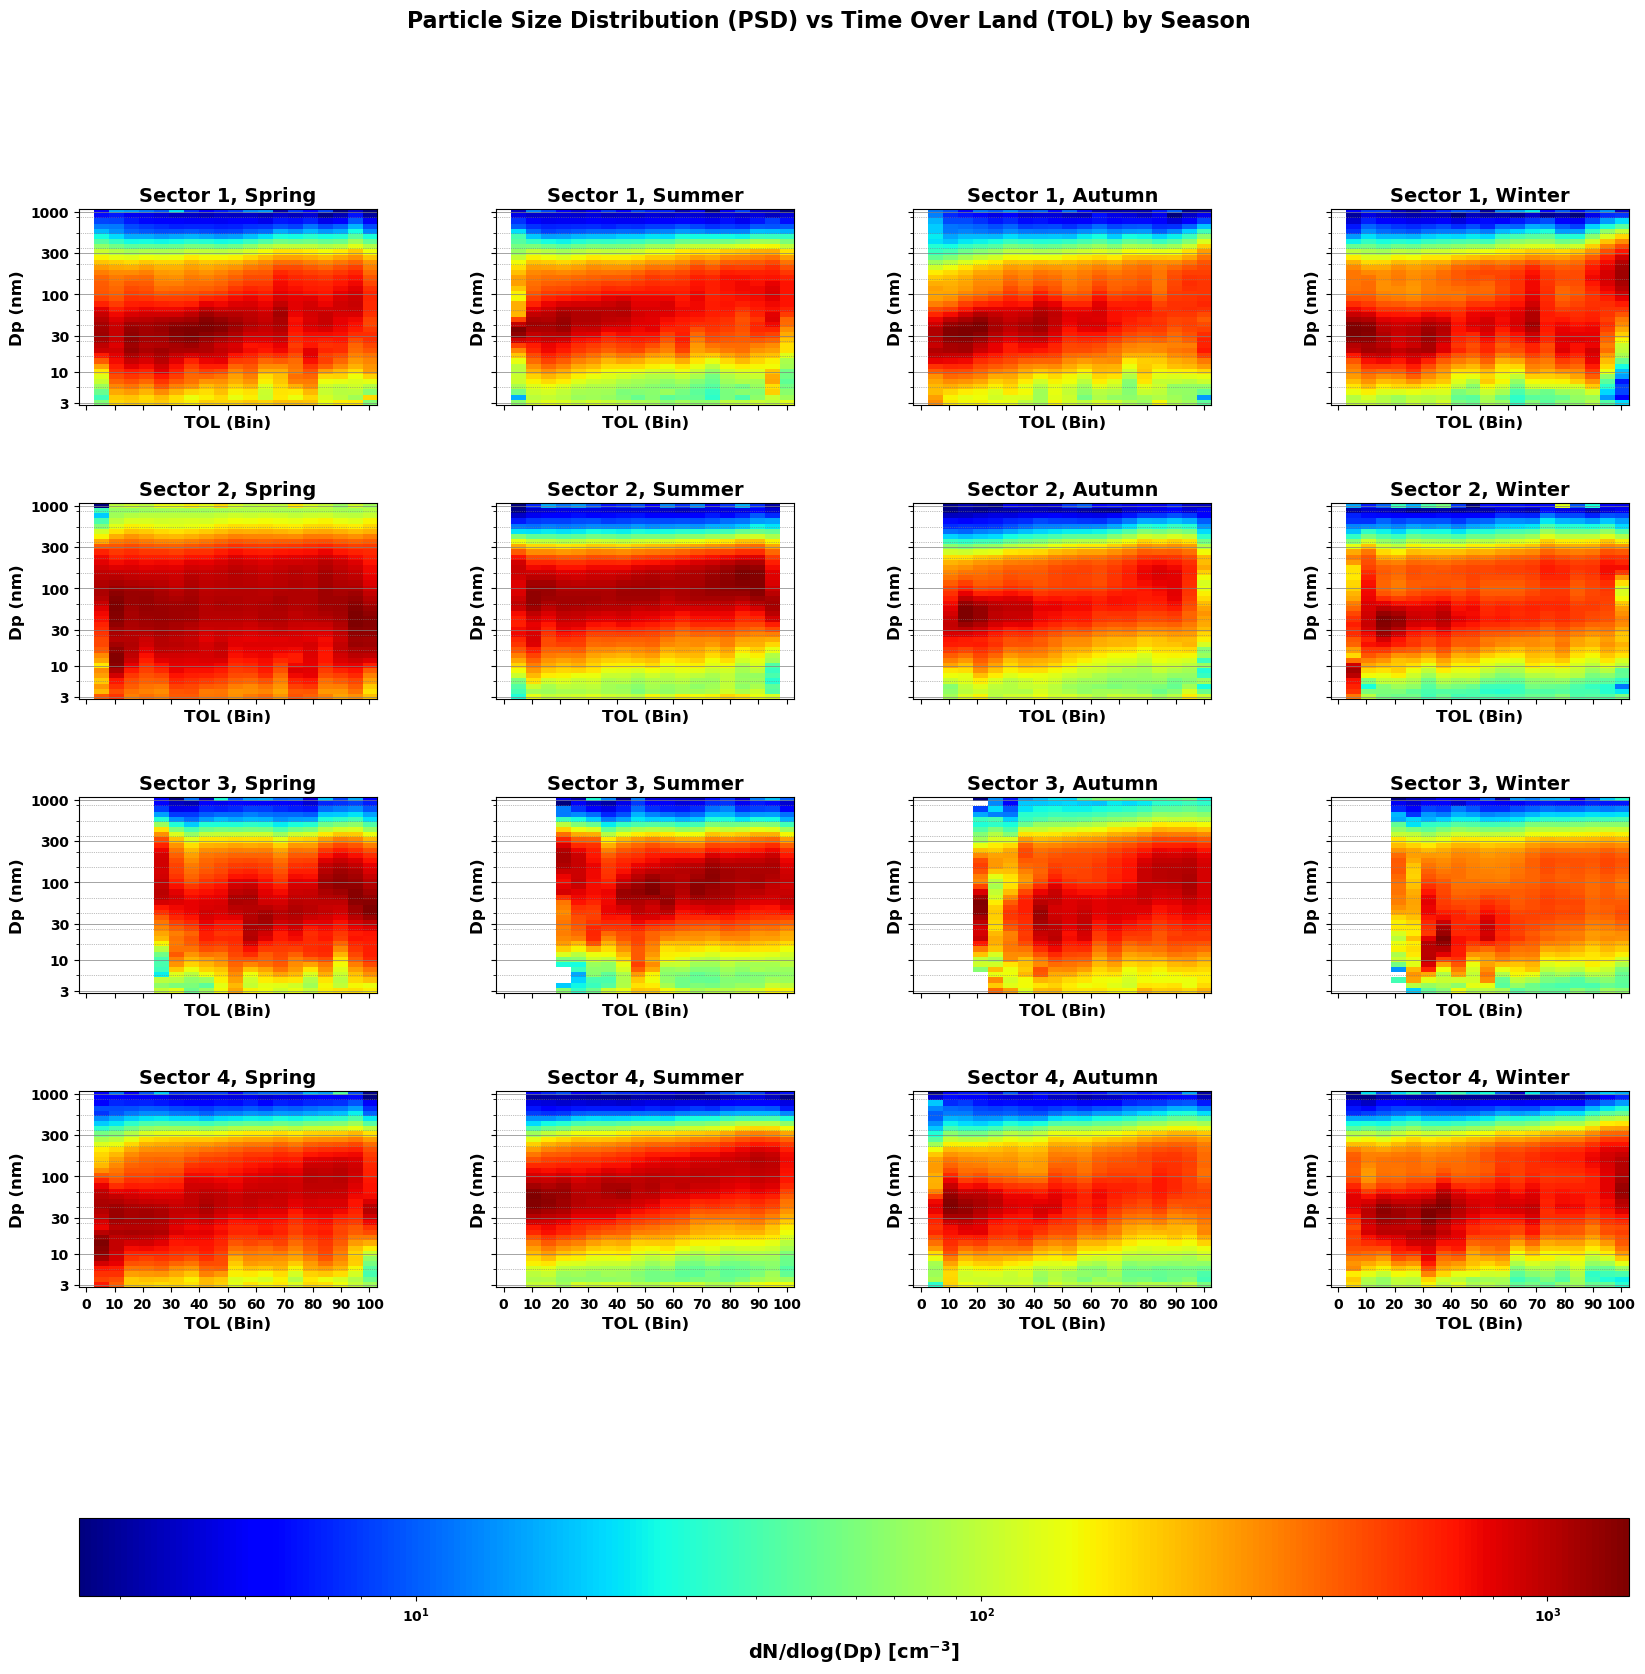

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import AutoMinorLocator

# Load the data from the Excel file
file_path = '/Users/touqeergill/Desktop/PSD VS TOL (Tunved)2.xlsx'
data = pd.read_excel(file_path)

# Convert the 'Date and Time' to datetime format
data['Date and Time'] = pd.to_datetime(data['Date and Time'])

# Define seasons in Finland
def assign_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Apply the season function
data['Season'] = data['Date and Time'].apply(assign_season)

# Define bin size and range for Time Over Land
bins = np.linspace(0, 100, 21)  # Creating 20 bins from 0 to 100
data['TimeOverLandBin'] = pd.cut(data['TimeOverLand'], bins, labels=np.arange(20), right=False)

# Prepare the data by binning Time Over Land and taking the mean for each bin and particle size
sector_season_grouped = {}
particle_sizes = data.columns[3:-2]  # Adjust to exclude 'Sector', 'Date and Time', 'TimeOverLand', 'Season', and 'TimeOverLandBin'
for sector in range(1, 5):
    for season in ['Spring', 'Summer', 'Autumn', 'Winter']:
        mask = (data['Sector'] == sector) & (data['Season'] == season)
        grouped = data[mask].groupby('TimeOverLandBin')[particle_sizes].mean()
        sector_season_grouped[(sector, season)] = grouped

# Convert particle sizes to floats and sort
particle_size_floats = [float(size) for size in particle_sizes]
particle_size_floats.sort()

# Define specific tick values and labels for particle sizes (in nanometers)
specific_ticks = [3e-9, 1e-8, 3e-8, 1e-7, 3e-7, 1e-6]  # Values in meters
specific_tick_labels = ['3', '10', '30', '100', '300', '1000']  # Corresponding labels in nanometers
specific_tick_positions = [np.argmin(np.abs(np.array(particle_size_floats) - tick)) for tick in specific_ticks]

# Plotting with 'jet' colormap
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
plt.suptitle('Particle Size Distribution (PSD) vs Time Over Land (TOL) by Season', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flatten()):
    sector, season = divmod(i, 4)
    sector += 1
    im = ax.imshow(sector_season_grouped[(sector, ['Spring', 'Summer', 'Autumn', 'Winter'][season])].T, aspect='auto', origin='lower', interpolation='none', cmap='jet', norm=LogNorm())
    ax.set_title(f'Sector {sector}, {["Spring", "Summer", "Autumn", "Winter"][season]}', fontsize=14, fontweight='bold')
    ax.set_xlabel('TOL (Bin)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Dp (nm)', fontsize=12, fontweight='bold')
    ax.set_xticks(np.linspace(0, 19, 11))
    ax.set_xticklabels(range(0, 101, 10), fontsize=10, fontweight='bold')
    ax.set_yticks(specific_tick_positions)  # Set specific tick positions for particle sizes
    ax.set_yticklabels(specific_tick_labels, fontsize=10, fontweight='bold')  # Set the corresponding labels in nm
    ax.grid(which='major', axis='y', linestyle='-', linewidth='0.5', color='gray')
    ax.grid(which='minor', axis='y', linestyle=':', linewidth='0.5', color='gray')
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Add a colorbar with increased label size and bold labels
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), orientation='horizontal')
cbar.set_label('$\\mathbf{dN/dlog(Dp)\ [cm^{-3}]}$', labelpad=10, fontweight='bold', fontsize=14)

# Set bold tick labels on the colorbar
cbar.ax.tick_params(labelsize=10)
for label in cbar.ax.get_xticklabels():
    label.set_fontweight('bold')

plt.show()

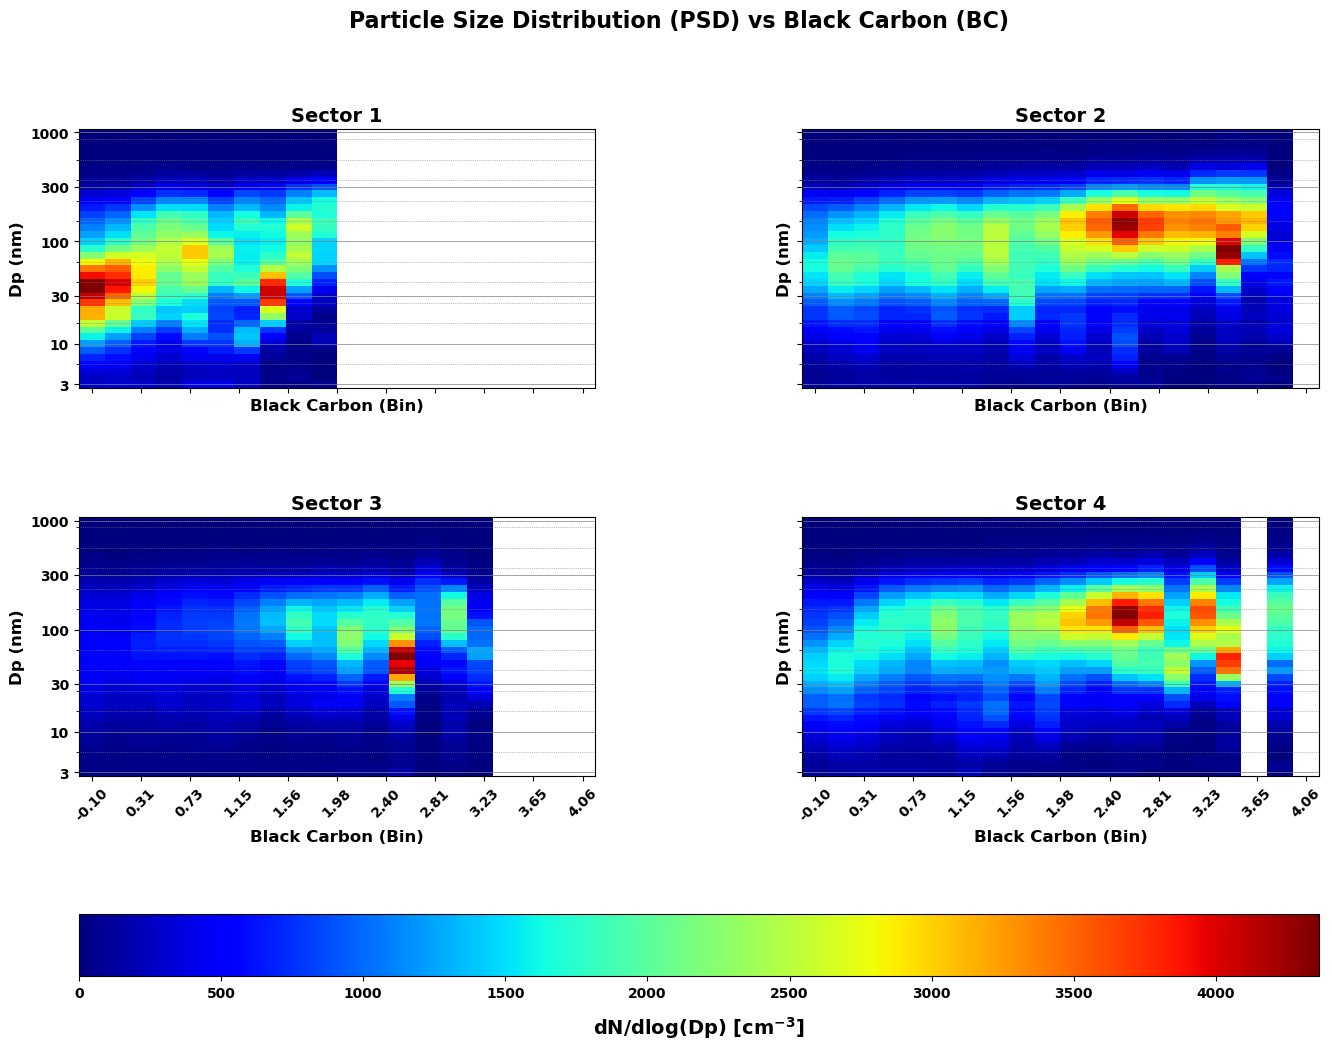

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Define the file path and file name
file_path = '/Users/touqeergill/Desktop/PSD VS BC (Tunved).xlsx'

# Load the data from the Excel file
data = pd.read_excel(file_path)

# Define bin size and range for Black Carbon (BC)
bc_bins = np.linspace(data['BC'].min(), data['BC'].max(), 21)  # Creating 20 bins

# Assign each 'BC' value to a bin
data['BCBin'] = pd.cut(data['BC'], bc_bins, labels=np.arange(20), right=False)

# Prepare the data by binning BC and taking the mean for each bin and particle size
sector_grouped_bc = {}
particle_sizes = data.columns[2:-1]  # Exclude 'Sector', 'BC', and 'BCBin' from the PSD columns
for sector in range(1, 5):
    sector_data = data[data['Sector'] == sector]
    grouped = sector_data.groupby('BCBin')[particle_sizes].mean()  # Focus only on particle sizes
    sector_grouped_bc[sector] = grouped

# Convert particle sizes to floats and sort
particle_size_floats = [float(size) for size in particle_sizes]
particle_size_floats.sort()

# Define specific tick values and labels for particle sizes (in nanometers)
specific_ticks = [3e-9, 1e-8, 3e-8, 1e-7, 3e-7, 1e-6]  # Values in meters
specific_tick_labels = ['3', '10', '30', '100', '300', '1000']  # Corresponding labels in nanometers
specific_tick_positions = [np.argmin(np.abs(np.array(particle_size_floats) - tick)) for tick in specific_ticks]

# Plotting with 'jet' colormap
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
plt.suptitle('Particle Size Distribution (PSD) vs Black Carbon (BC)', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flatten(), 1):
    if i in sector_grouped_bc:  # Only plot if the sector has data
        im = ax.imshow(sector_grouped_bc[i].T, aspect='auto', origin='lower', interpolation='none', cmap='jet')
        ax.set_title(f'Sector {i}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Black Carbon (Bin)', fontsize=12, fontweight='bold')
        ax.set_ylabel('Dp (nm)', fontsize=12, fontweight='bold')
        ax.set_xticks(np.linspace(0, 19, 11))  # Adjusted for 0, 10, 20, ..., max BC
        ax.set_xticklabels([f"{label:.2f}" for label in np.linspace(bc_bins.min(), bc_bins.max(), 11)], fontsize=10, fontweight='bold', rotation=45)  # Adjust labels to match the range
        ax.set_yticks(specific_tick_positions)  # Set specific tick positions for particle sizes
        ax.set_yticklabels(specific_tick_labels, fontsize=10, fontweight='bold')  # Set the corresponding labels in nm
        ax.grid(which='major', axis='y', linestyle='-', linewidth='0.5', color='gray')  # Major horizontal grid lines
        ax.grid(which='minor', axis='y', linestyle=':', linewidth='0.5', color='gray')  # Minor horizontal grid lines
        ax.yaxis.set_minor_locator(AutoMinorLocator(2))  # Set the minor locator for more detailed grid lines

# Add a colorbar with increased label size and bold labels
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), orientation='horizontal')
cbar.set_label('$\\mathbf{dN/dlog(Dp)\ [cm^{-3}]}$', labelpad=10, fontweight='bold', fontsize=14)

# Set bold tick labels on the colorbar
cbar.ax.tick_params(labelsize=10)
for label in cbar.ax.get_xticklabels():
    label.set_fontweight('bold')

plt.show()

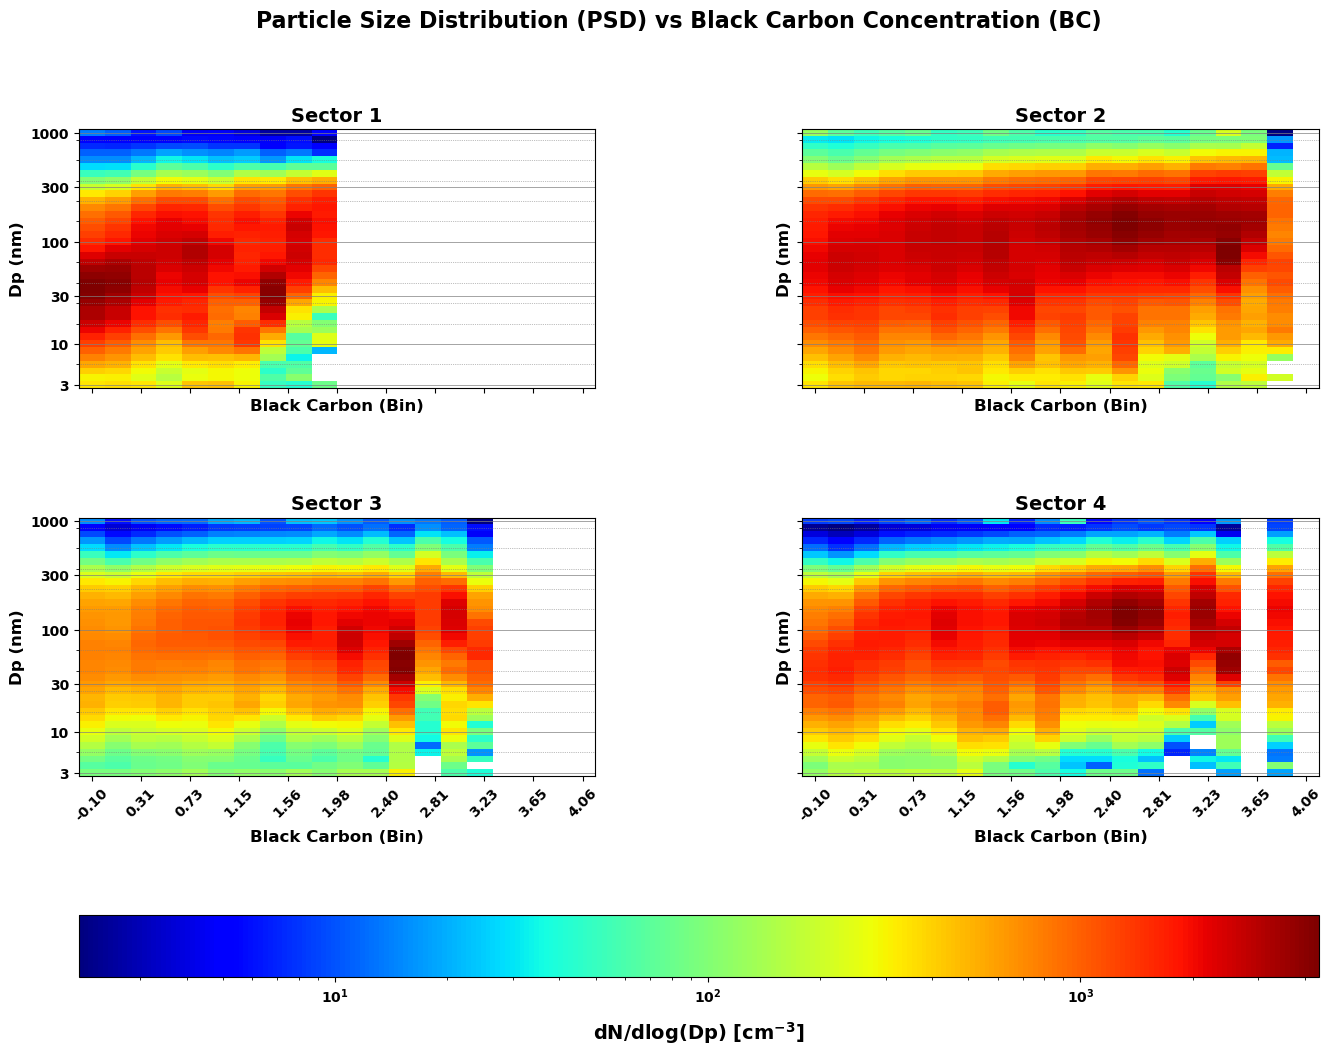

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import AutoMinorLocator

# Define the file path and file name
file_path = '/Users/touqeergill/Desktop/PSD VS BC (Tunved).xlsx'

# Load the data from the Excel file
data = pd.read_excel(file_path)

# Define bin size and range for Black Carbon based on its range in the data
bc_bins = np.linspace(data['BC'].min(), data['BC'].max(), 21)  # Creating 20 bins

# Assign each 'BC' value to a bin
data['BCBin'] = pd.cut(data['BC'], bc_bins, labels=np.arange(20), right=False)

# Prepare the data by binning BC and taking the mean for each bin and particle size
sector_grouped_bc = {}
particle_sizes = data.columns[2:-1]  # Exclude 'Sector', 'BC', and 'BCBin' from the PSD columns
for sector in range(1, 5):
    sector_data = data[data['Sector'] == sector]
    grouped = sector_data.groupby('BCBin')[particle_sizes].mean()  # Focus only on particle sizes
    sector_grouped_bc[sector] = grouped

# Convert particle sizes to floats and sort
particle_size_floats = [float(size) for size in particle_sizes]
particle_size_floats.sort()

# Define specific tick values and labels for particle sizes (in nanometers)
specific_ticks = [3e-9, 1e-8, 3e-8, 1e-7, 3e-7, 1e-6]  # Values in meters
specific_tick_labels = ['3', '10', '30', '100', '300', '1000']  # Corresponding labels in nanometers
specific_tick_positions = [np.argmin(np.abs(np.array(particle_size_floats) - tick)) for tick in specific_ticks]

# Plotting with 'jet' colormap
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
plt.suptitle('Particle Size Distribution (PSD) vs Black Carbon Concentration (BC)', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flatten(), 1):
    if i in sector_grouped_bc:
        im = ax.imshow(sector_grouped_bc[i].T, aspect='auto', origin='lower', interpolation='none', cmap='jet', norm=LogNorm())
        ax.set_title(f'Sector {i}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Black Carbon (Bin)', fontsize=12, fontweight='bold')
        ax.set_ylabel('Dp (nm)', fontsize=12, fontweight='bold')
        ax.set_xticks(np.linspace(0, 19, 11))  # Adjusted for 0, 10, 20, ..., 100
        ax.set_xticklabels([f"{label:.2f}" for label in np.linspace(data['BC'].min(), data['BC'].max(), 11)], fontsize=10, fontweight='bold', rotation=45)
        ax.set_yticks(specific_tick_positions)  # Set specific tick positions for particle sizes
        ax.set_yticklabels(specific_tick_labels, fontsize=10, fontweight='bold')  # Set the corresponding labels in nm
        ax.grid(which='major', axis='y', linestyle='-', linewidth='0.5', color='gray')  # Major horizontal grid lines
        ax.grid(which='minor', axis='y', linestyle=':', linewidth='0.5', color='gray')  # Minor horizontal grid lines
        ax.yaxis.set_minor_locator(AutoMinorLocator(2))  # Set the minor locator for more detailed grid lines

# Add a colorbar with increased label size and bold labels
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), orientation='horizontal')
cbar.set_label('$\\mathbf{dN/dlog(Dp)\ [cm^{-3}]}$', labelpad=10, fontweight='bold', fontsize=14)

# Set bold tick labels on the colorbar
cbar.ax.tick_params(labelsize=10)
for label in cbar.ax.get_xticklabels():
    label.set_fontweight('bold')

plt.show()

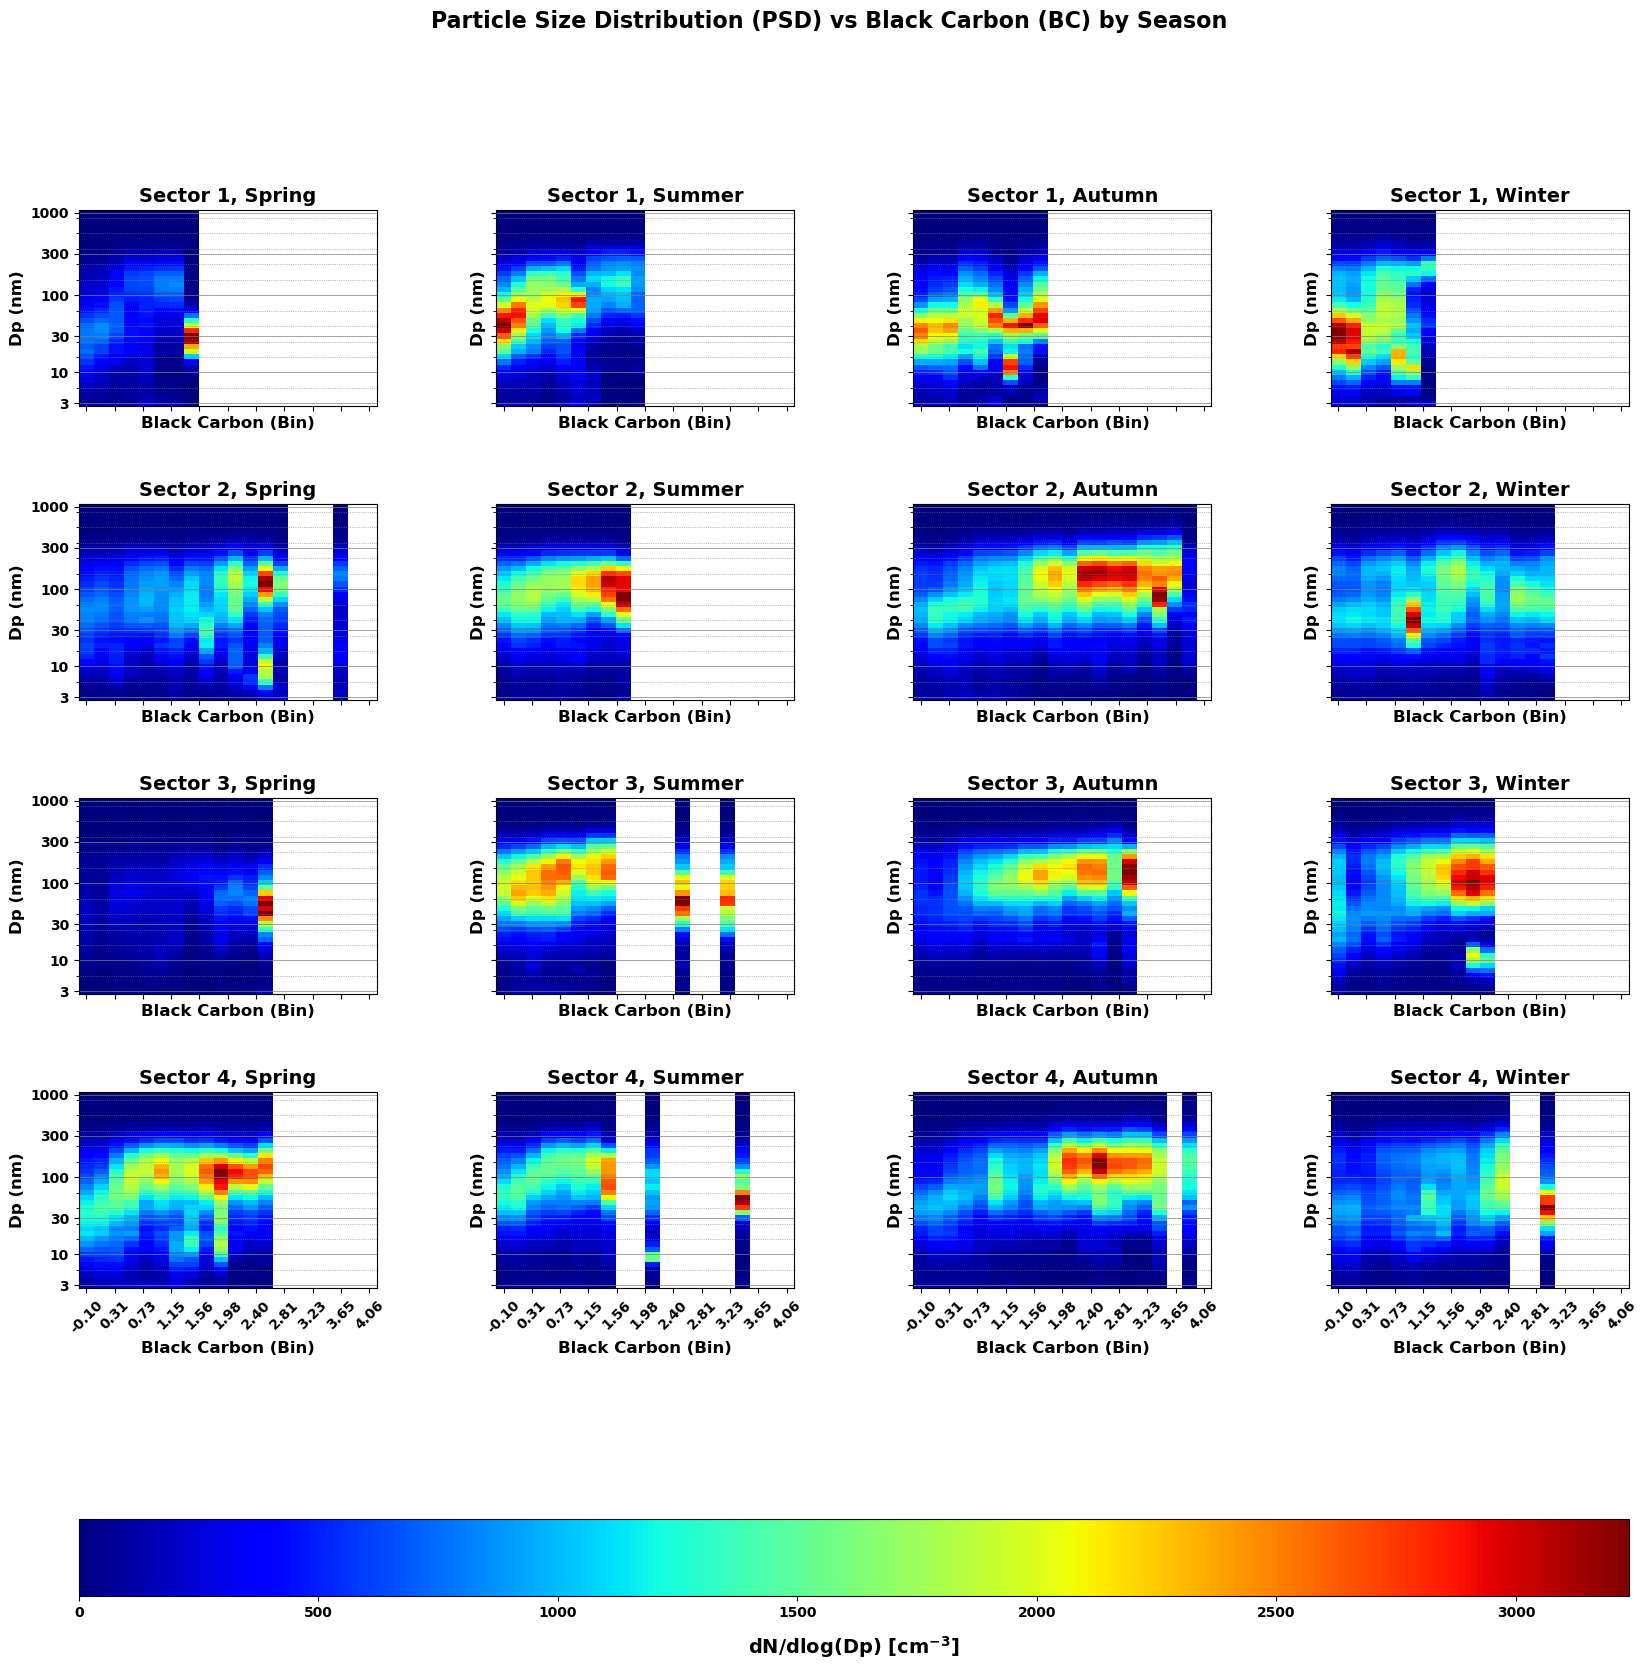

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Load the data from the Excel file
file_path = '/Users/touqeergill/Desktop/PSD VS BC (Tunved)2.xlsx'
data = pd.read_excel(file_path)

# Convert the 'Date and Time' to datetime format
data['Date and Time'] = pd.to_datetime(data['Date and Time'])

# Define seasons in Finland
def assign_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Apply the season function
data['Season'] = data['Date and Time'].apply(assign_season)

# Define bin size and range for Black Carbon (BC)
bc_bins = np.linspace(data['BC'].min(), data['BC'].max(), 21)  # Creating 20 bins
data['BCBin'] = pd.cut(data['BC'], bc_bins, labels=np.arange(20), right=False)

# Prepare the data by binning BC and taking the mean for each bin and particle size
sector_season_grouped_bc = {}
particle_sizes = data.columns[3:-2]  # Adjust to exclude 'Sector', 'Date and Time', 'BC', 'Season', and 'BCBin'
for sector in range(1, 5):
    for season in ['Spring', 'Summer', 'Autumn', 'Winter']:
        mask = (data['Sector'] == sector) & (data['Season'] == season)
        grouped = data[mask].groupby('BCBin')[particle_sizes].mean()
        sector_season_grouped_bc[(sector, season)] = grouped

# Convert particle sizes to floats and sort
particle_size_floats = [float(size) for size in particle_sizes]
particle_size_floats.sort()

# Define specific tick values and labels for particle sizes (in nanometers)
specific_ticks = [3e-9, 1e-8, 3e-8, 1e-7, 3e-7, 1e-6]  # Values in meters
specific_tick_labels = ['3', '10', '30', '100', '300', '1000']  # Corresponding labels in nanometers
specific_tick_positions = [np.argmin(np.abs(np.array(particle_size_floats) - tick)) for tick in specific_ticks]

# Plotting with 'jet' colormap
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
plt.suptitle('Particle Size Distribution (PSD) vs Black Carbon (BC) by Season', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flatten()):
    sector, season = divmod(i, 4)
    sector += 1
    if (sector, ['Spring', 'Summer', 'Autumn', 'Winter'][season]) in sector_season_grouped_bc:
        im = ax.imshow(sector_season_grouped_bc[(sector, ['Spring', 'Summer', 'Autumn', 'Winter'][season])].T, aspect='auto', origin='lower', interpolation='none', cmap='jet')
        ax.set_title(f'Sector {sector}, {["Spring", "Summer", "Autumn", "Winter"][season]}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Black Carbon (Bin)', fontsize=12, fontweight='bold')
        ax.set_ylabel('Dp (nm)', fontsize=12, fontweight='bold')
        ax.set_xticks(np.linspace(0, 19, 11))
        ax.set_xticklabels([f"{label:.2f}" for label in np.linspace(bc_bins.min(), bc_bins.max(), 11)], fontsize=10, fontweight='bold', rotation=45)
        ax.set_yticks(specific_tick_positions)  # Set specific tick positions for particle sizes
        ax.set_yticklabels(specific_tick_labels, fontsize=10, fontweight='bold')  # Set the corresponding labels in nm
        ax.grid(which='major', axis='y', linestyle='-', linewidth='0.5', color='gray')
        ax.grid(which='minor', axis='y', linestyle=':', linewidth='0.5', color='gray')
        ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Add a colorbar with increased label size and bold labels
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), orientation='horizontal')
cbar.set_label('$\\mathbf{dN/dlog(Dp)\ [cm^{-3}]}$', labelpad=10, fontweight='bold', fontsize=14)

# Set bold tick labels on the colorbar
cbar.ax.tick_params(labelsize=10)
for label in cbar.ax.get_xticklabels():
    label.set_fontweight('bold')

plt.show()

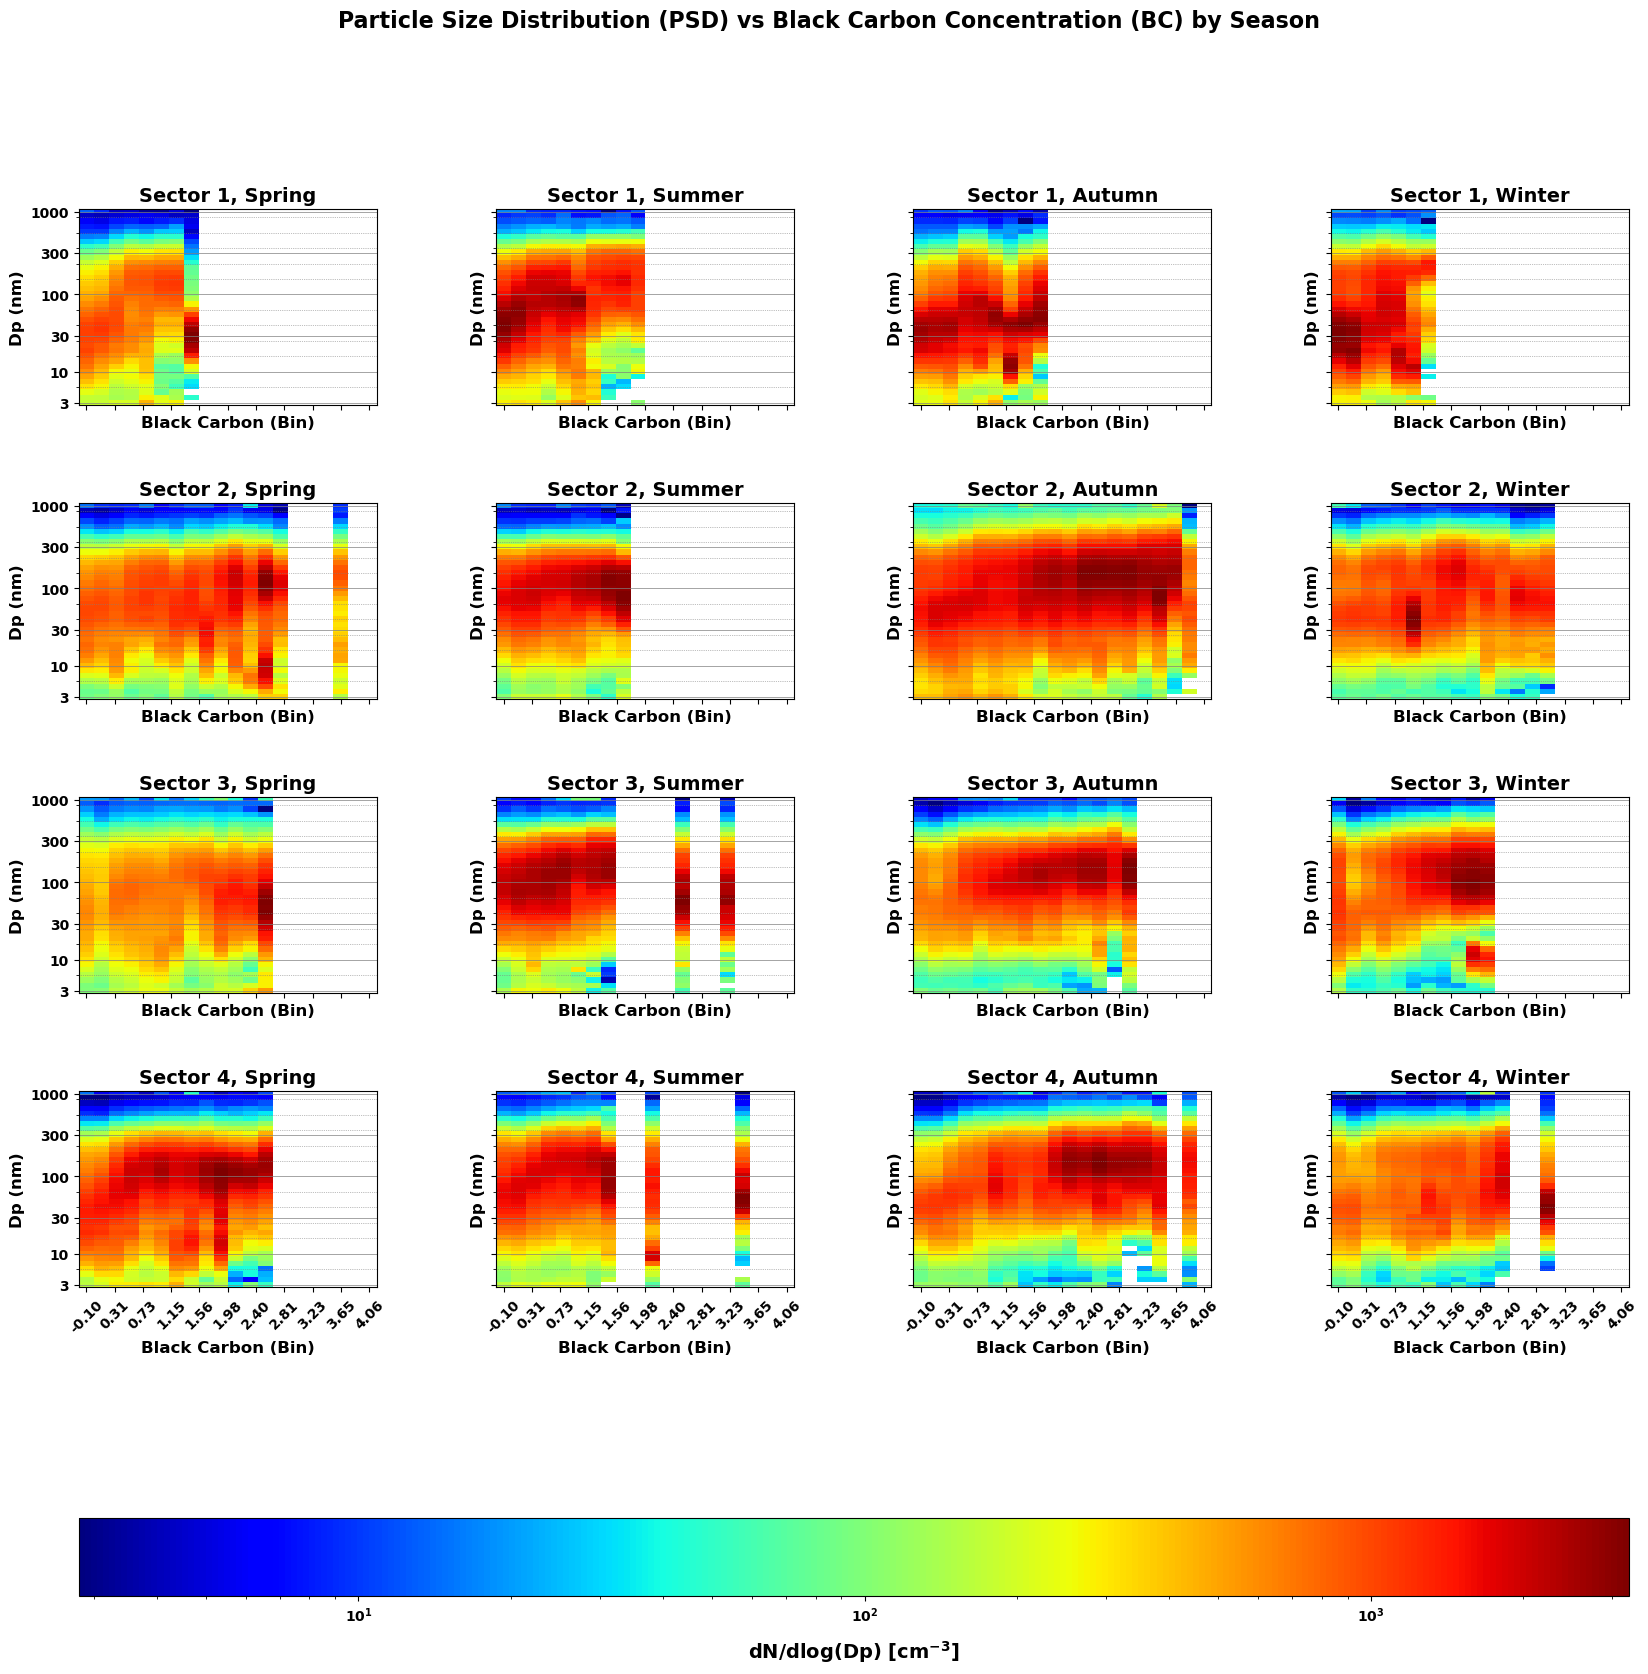

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import AutoMinorLocator

# Load the data from the Excel file
file_path = '/Users/touqeergill/Desktop/PSD VS BC (Tunved)2.xlsx'
data = pd.read_excel(file_path)

# Convert 'Date and Time' to datetime format
data['Date and Time'] = pd.to_datetime(data['Date and Time'])

# Define seasons in Finland
def assign_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Apply the season function
data['Season'] = data['Date and Time'].apply(assign_season)

# Define bin size and range for Black Carbon based on its range in the data
bc_bins = np.linspace(data['BC'].min(), data['BC'].max(), 21)  # Creating 20 bins
data['BCBin'] = pd.cut(data['BC'], bc_bins, labels=np.arange(20), right=False)

# Exclude non-numeric columns and ensure we only handle numeric data for particle sizes
particle_sizes = [col for col in data.columns if data[col].dtype in [np.float64, np.int64] and col not in ['Sector', 'BC']]

# Prepare the data by binning BC and taking the mean for each bin and particle size
sector_season_grouped_bc = {}
for sector in range(1, 5):
    for season in ['Spring', 'Summer', 'Autumn', 'Winter']:
        mask = (data['Sector'] == sector) & (data['Season'] == season)
        grouped = data[mask].groupby('BCBin')[particle_sizes].mean()
        sector_season_grouped_bc[(sector, season)] = grouped

# Convert particle sizes to floats and sort
particle_size_floats = [float(size) for size in particle_sizes]
particle_size_floats.sort()

# Define specific tick values and labels for particle sizes (in nanometers)
specific_ticks = [3e-9, 1e-8, 3e-8, 1e-7, 3e-7, 1e-6]  # Values in meters
specific_tick_labels = ['3', '10', '30', '100', '300', '1000']  # Corresponding labels in nanometers
specific_tick_positions = [np.argmin(np.abs(np.array(particle_size_floats) - tick)) for tick in specific_ticks]

# Plotting with 'jet' colormap
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
plt.suptitle('Particle Size Distribution (PSD) vs Black Carbon Concentration (BC) by Season', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flatten()):
    sector, season = divmod(i, 4)
    sector += 1
    if (sector, ['Spring', 'Summer', 'Autumn', 'Winter'][season]) in sector_season_grouped_bc:
        im = ax.imshow(sector_season_grouped_bc[(sector, ['Spring', 'Summer', 'Autumn', 'Winter'][season])].T, aspect='auto', origin='lower', interpolation='none', cmap='jet', norm=LogNorm())
        ax.set_title(f'Sector {sector}, {["Spring", "Summer", "Autumn", "Winter"][season]}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Black Carbon (Bin)', fontsize=12, fontweight='bold')
        ax.set_ylabel('Dp (nm)', fontsize=12, fontweight='bold')
        ax.set_xticks(np.linspace(0, 19, 11))
        ax.set_xticklabels([f"{label:.2f}" for label in np.linspace(bc_bins.min(), bc_bins.max(), 11)], fontsize=10, fontweight='bold', rotation=45)
        ax.set_yticks(specific_tick_positions)  # Set specific tick positions for particle sizes
        ax.set_yticklabels(specific_tick_labels, fontsize=10, fontweight='bold')  # Set the corresponding labels in nm
        ax.grid(which='major', axis='y', linestyle='-', linewidth='0.5', color='gray')
        ax.grid(which='minor', axis='y', linestyle=':', linewidth='0.5', color='gray')
        ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Add a colorbar with increased label size and bold labels
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), orientation='horizontal')
cbar.set_label('$\\mathbf{dN/dlog(Dp)\ [cm^{-3}]}$', labelpad=10, fontweight='bold', fontsize=14)

# Set bold tick labels on the colorbar
cbar.ax.tick_params(labelsize=10)
for label in cbar.ax.get_xticklabels():
    label.set_fontweight('bold')

plt.show()